In [130]:
# import section
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
import warnings
warnings.filterwarnings('ignore')

### Basic Scatter Plot

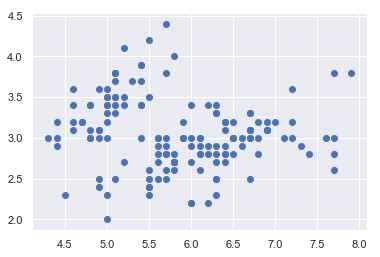

In [132]:
iris = sns.load_dataset('iris')
plt.scatter(x = iris.sepal_length, y = iris.sepal_width)
plt.show()

### Scatter Plot with Legend

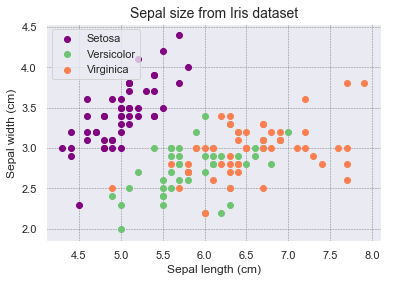

In [133]:
iris = sns.load_dataset('iris')
fig = plt.figure()
ax = fig.add_subplot(111)

species_1 = ax.scatter(x = iris[:50].sepal_length, y = iris[:50].sepal_width,  c = 'purple')
species_2 = ax.scatter(x = iris[50:100].sepal_length, y = iris[50:100].sepal_width,  c = '#6FC471')
species_3 = ax.scatter(x = iris[100:].sepal_length, y = iris[100:].sepal_width,  c = 'coral')

ax.legend([species_1, species_2, species_3], ['Setosa', 'Versicolor', 'Virginica'], loc = 2)

ax.set_title('Sepal size from Iris dataset', fontsize = 14)

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')

ax.grid(True, linestyle = '--', linewidth = 0.5, color = 'gray')

plt.show()

[RGB colors](https://xkcd.com/color/rgb)

[HTML colors](https://htmlcolorcodes.com/)

### Colorbar

In [134]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


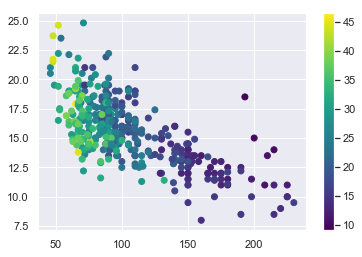

In [135]:
plt.scatter(x = mpg.horsepower, y = mpg.acceleration, c= mpg.mpg, cmap = 'viridis')
plt.colorbar()
plt.show()

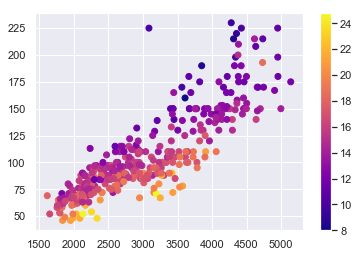

In [136]:
plt.scatter(x= mpg.weight, y = mpg.horsepower, c = mpg.acceleration, cmap = 'plasma')
plt.colorbar()
plt.show()

### Save Figure

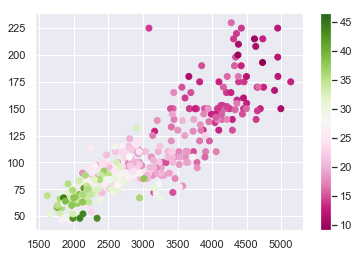

In [137]:
plt.scatter(x = mpg.weight, y = mpg.horsepower, c = mpg.mpg, cmap = 'PiYG')
plt.colorbar()
plt.draw()
plt.savefig('../output/mpg.png', dpi = 300)
plt.savefig('../output/mpg.svg')
plt.show()

### Colorbar

In [138]:
from sklearn.datasets import load_iris
iris =  load_iris()

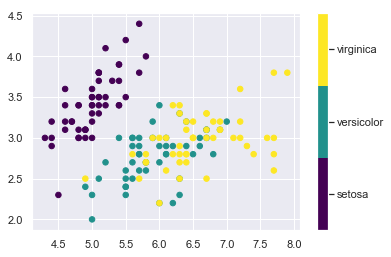

In [139]:
# use plt.cm.get_cmap(cmap, N) to get an N-bin version of cmap# use p 
plt.scatter(iris.data[:, 0], iris.data[:, 1], s = 30, c = iris.target, cmap = plt.cm.get_cmap('viridis', 3))

# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: iris.target_names[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);

# Set the clim so that labels are centered on each block
plt.clim(-0.5, 2.5)

[Colormaps Reference]( https://matplotlib.org/examples/color/colormaps_reference.html)

### FaceGrid (seaborn)

In [140]:
iris = sns.load_dataset('iris')
iris_petal = pd.DataFrame(iris.iloc[:,-3:].values, columns = ['length', 'width', 'species'])
iris_petal['type'] = 'petal'
iris_sepal = pd.DataFrame(iris.iloc[:,[0, 1, -1]].values, columns = ['length', 'width', 'species'])
iris_sepal['type'] = 'sepal'
iris = pd.concat([iris_sepal, iris_petal])
iris.length = iris.length.astype('float', copy = False)
iris.width = iris.width.astype('float', copy = False)
iris.sample(n = 10)

,length,width,species,type
59,5.2,2.7,versicolor,sepal
87,6.3,2.3,versicolor,sepal
60,3.5,1.0,versicolor,petal
33,5.5,4.2,setosa,sepal
19,1.5,0.3,setosa,petal
10,5.4,3.7,setosa,sepal
75,6.6,3.0,versicolor,sepal
94,4.2,1.3,versicolor,petal
12,1.4,0.1,setosa,petal
144,5.7,2.5,virginica,petal


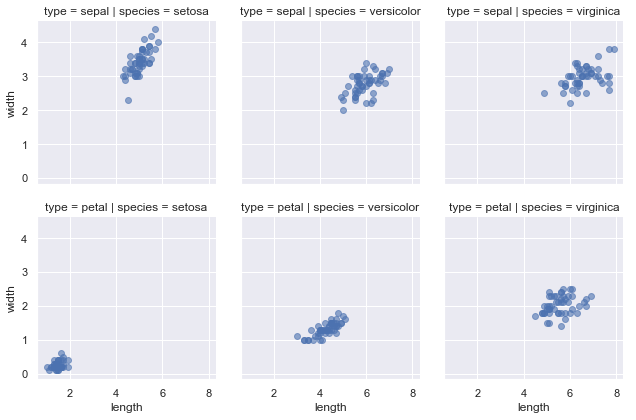

In [141]:
g = sns.FacetGrid(iris, col = 'species',  row = 'type')
g = g.map(plt.scatter, 'length', 'width', alpha = 0.6)

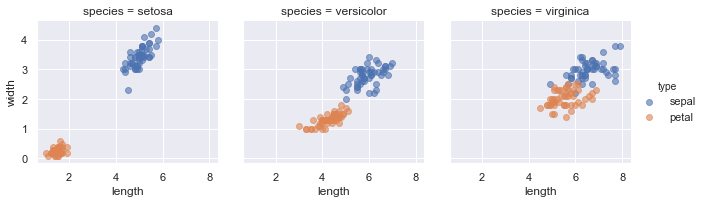

In [142]:
g = sns.FacetGrid(iris, col = 'species', hue = 'type')
g = (g.map(plt.scatter, 'length', 'width', alpha = 0.6).add_legend())

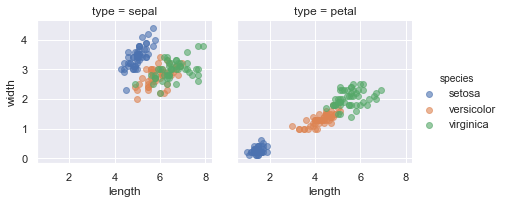

In [143]:
g = sns.FacetGrid(iris, col = 'type',  hue = 'species')
g = (g.map(plt.scatter, 'length', 'width', alpha = 0.6).add_legend())

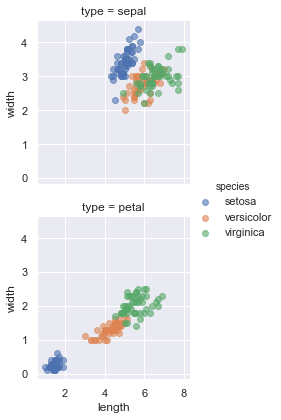

In [144]:
g = sns.FacetGrid(iris, row = 'type',  hue = 'species')
g = (g.map(plt.scatter, 'length', 'width', alpha = 0.6).add_legend())

### Heatmap (seaborn)

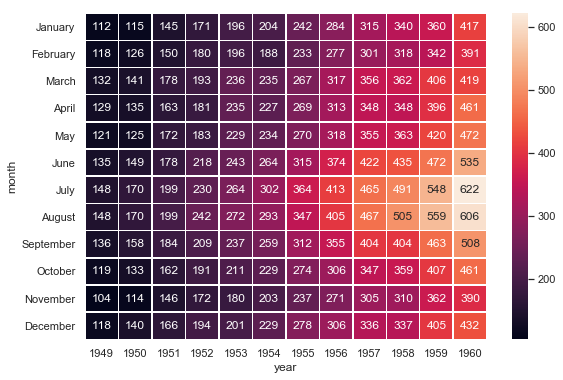

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset('flights')
flights = flights_long.pivot('month', 'year', 'passengers')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot = True, fmt = 'd', linewidths = 0.5, ax = ax)
plt.show()